In [1]:
import numpy as np
from rich.pretty import Pretty
from sigpyproc.readers import FilReader

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [2]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [3]:
off_Fil_masked = FilReader("pulsardata_masked.fil") # off 


In [4]:
off_data_masked = off_Fil_masked.read_block(0,off_Fil_masked.header.nsamples,off_Fil_masked.header.fch1,off_Fil_masked.header.nchans)

In [5]:
off_data_masked_norm = off_data_masked.normalise()

In [6]:
dm_vals = np.linspace(-30,40,101)
dm_t_array = np.zeros((dm_vals.size,off_data_masked_norm.data.shape[-1]))

for ii,dm_i in enumerate(dm_vals):
    dedisp_array = off_data_masked_norm.dedisperse(dm_i)
    dm_t_array[ii,:] = dedisp_array.get_tim().data


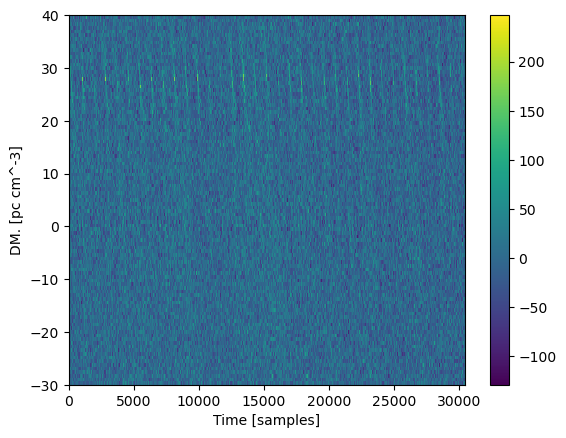

In [7]:
plt.figure()
plt.imshow(dm_t_array,origin='lower',aspect='auto',interpolation='nearest',extent=[0,off_Fil_masked.header.nsamples,dm_vals[0],dm_vals[-1]])
plt.colorbar()
plt.xlabel('Time [samples]')
plt.ylabel('DM. [pc cm^-3]')
plt.show()
